In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
#reflect an existing database into a new model

#reflect the tables
Base = automap_base()
Base.prepare(engine, reflect = True)

# We can view all of the classes that automap found
Station = Base.classes.station
Measurement = Base.classes.measurement

session = Session(engine)

In [7]:
# Create our session (link) from Python to the DB
Base.classes.keys()


['measurement', 'station']

In [8]:
dir(Measurement)

['__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_decl_class_registry',
 '_sa_class_manager',
 '_sa_decl_prepare',
 '_sa_raise_deferred_config',
 'classes',
 'date',
 'id',
 'metadata',
 'prcp',
 'prepare',
 'station',
 'tobs']

In [9]:
#date = dt.datetime.strptime(str(precipitation_df.index[-1]),"%Y-%m-%d")- dt.timedelta(days = 365)
query_date = dt.date(2011, 4, 8) - dt.timedelta(days=7)

In [10]:
precipitation = session.query(Measurement.prcp,Measurement.date)
precipitation_df = pd.DataFrame(precipitation)
precipitation_df

,prcp,date
0,0.08,2010-01-01
1,0.00,2010-01-02
2,0.00,2010-01-03
3,0.00,2010-01-04
4,NaN,2010-01-06
...,...,...
19545,0.09,2017-08-19
19546,NaN,2017-08-20
19547,0.56,2017-08-21
19548,0.50,2017-08-22


# Exploratory Climate Analysis

Text(0, 0.5, 'Precipitation')

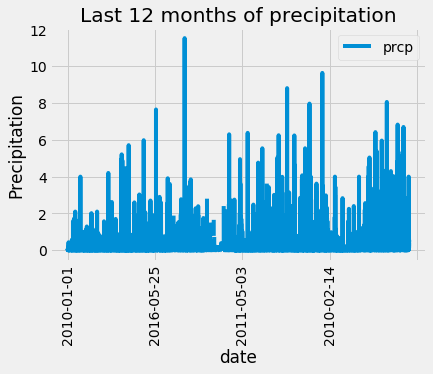

In [11]:
precipitation_df.set_index('date', inplace=True)
precipitation_df.plot(title = "Last 12 months of precipitation", rot = 90)
plt.ylabel("Precipitation")

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [13]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = engine.execute("SELECT Measurement.station, count(Measurement.station) as cnt\
                                 From Measurement\
                                 group by Measurement.station\
                                 order by cnt desc").fetchall()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
dir(Station)

['__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_decl_class_registry',
 '_sa_class_manager',
 '_sa_decl_prepare',
 '_sa_raise_deferred_config',
 'classes',
 'elevation',
 'id',
 'latitude',
 'longitude',
 'metadata',
 'name',
 'prepare',
 'station']

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temperature_observed = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), 
func.avg(Measurement.tobs)).filter(Measurement.station == Station.station).all()
temperature_observed


[('USC00519397', 53.0, 87.0, 73.09795396419437)]

In [26]:
# Choose the station with the highest number of temperature observations.
max_temperature_station = session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).\
                          order_by(func.count(Measurement.tobs).desc()).all()

highest_station = max_temperature_station
max_temperature_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [45]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_obs = session.query(Measurement.station,Measurement.date, Measurement.tobs).\
                filter(Measurement.date > query_date).\
                  order_by(Measurement.date).all()
temperature_obs_df =pd.DataFrame(temperature_obs)

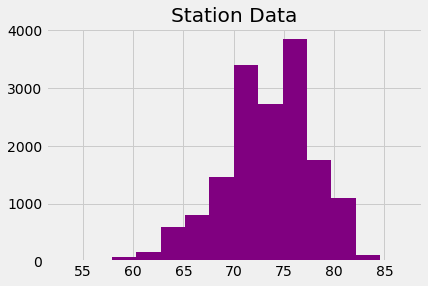

In [47]:
plt.hist(temperature_obs_df['tobs'],14, color = "purple")
plt.title("Station Data")
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
